In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/ericmacdougall/Downloads/archive (14)/DEV _ March Madness.csv')

In [4]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [5]:
pd.set_option('display.max_info_rows', 150)
pd.set_option('display.max_info_columns', 150)

Given the size of the dataset, it requires us to change the output settings so we can get all the columns and their types.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8315 entries, 0 to 8314
Data columns (total 147 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    Season                                int64  
 1    Short Conference Name                 object 
 2    Adjusted Temo                         float64
 3    Adjusted Tempo Rank                   int64  
 4    Raw Tempo                             float64
 5    Raw Tempo Rank                        int64  
 6    Adjusted Offensive Efficiency         float64
 7    Adjusted Offensive Efficiency Rank    int64  
 8    Raw Offensive Efficiency              float64
 9    Raw Offensive Efficiency Rank         int64  
 10   Adjusted Defensive Efficiency         float64
 11   Adjusted Defensive Efficiency Rank    int64  
 12   Raw Defensive Efficiency              float64
 13   Raw Defensive Efficiency Rank         int64  
 14   Avg Possession Length (Offense)       float64
 15   Av

In [8]:
pd.set_option('display.max_columns', 150)
df.head()

Season Short Conference Name  Adjusted Temo  Adjusted Tempo Rank  \
0    2025                   ACC           66.1                  262   
1    2025                   SEC           68.6                  121   
2    2015                   SEC           62.4                  274   
3    2021                   WCC           73.8                    7   
4    2024                    BE           64.6                  330   

   Raw Tempo  Raw Tempo Rank  Adjusted Offensive Efficiency  \
0       66.4             270                          128.9   
1       69.4             111                          130.7   
2       63.8             242                          121.3   
3       74.3              14                          126.4   
4       66.0             305                          127.5   

   Adjusted Offensive Efficiency Rank  Raw Offensive Efficiency  \
0                                   2                     125.3   
1                                   1                     122.9   
2                                   6                     115.5   
3                                   1                     121.9   
4                                   1                     123.0   

   Raw Offensive Efficiency Rank  Adjusted Defensive Efficiency  \
0                              1                           89.8   
1                              2                           93.1   
2                              9                           84.4   
3                              1                           89.9   
4                              1                           91.1   

   Adjusted Defensive Efficiency Rank  Raw Defensive Efficiency  \
0                                   4                      92.1   
1                                  10                      99.2   
2                                   1                      84.7   
3                                  11                      93.4   
4                                   4                      96.4   

   Raw Defensive Efficiency Rank  Avg Possession Length (Offense)  \
0                              2                             17.0   
1                             34                             17.1   
2                              1                             17.7   
3                             17                             14.4   
4                              9                             18.6   

   Avg Possession Length (Offense) Rank  Avg Possession Length (Defense)  \
0                                 107.0                             19.1   
1                                 117.0                             17.7   
2                                  98.0                             19.6   
3                                   3.0                             18.0   
4                                 305.0                             17.5   

   Avg Possession Length (Defense) Rank     eFGPct  RankeFGPct      TOPct  \
0                                 363.0  57.663170           5  14.068787   
1                                 202.0  56.048835          20  13.025510   
2                                 327.0  51.511600          75  16.252900   
3                                 299.0  61.017812           1  16.127934   
4                                 183.0  56.907478           7  14.499681   

   RankTOPct      ORPct  RankORPct     FTRate  RankFTRate      OffFT  \
0         15  35.351351         30  32.284382         195  17.951907   
1          4  35.151515         34  33.962264         148  18.449738   
2         32  39.501200          8  43.860500          31  23.620700   
3         40  30.070636        102  35.725191          66  17.622810   
4         36  36.697966         12  31.939163         202  17.260442   

   RankOffFT   Off2PtFG  RankOff2PtFG   Off3PtFG  RankOff3PtFG      DefFT  \
0        245  44.859038           318  37.189055            53  17.146080   
1        209  48.607186           210  32.943076           140  23

The data seems to have loaded correctly. Given the amount of fields and the reality that I am not familiar with all these statistical features, it's possible that an object should be an double or vise versa. The dataset's data dictionary was consulted while inspecting these fields.

In [10]:
df.duplicated().sum()

0

In [11]:
df.dropna().reset_index(drop=True).shape

(0, 147)

All rows have null values in them.

In [13]:
pd.set_option('display.max_columns', 150)
null_columns = pd.DataFrame(df.isna().sum() / len(df)).T.loc[:, (pd.DataFrame(df.isna().sum() / len(df)).T != 0).all()]
print('Number of columns with nulls:', len(null_columns.columns))
null_columns

Number of columns with nulls: 62


Avg Possession Length (Offense)  Avg Possession Length (Offense) Rank  \
0                         0.320505                              0.320505   

   Avg Possession Length (Defense)  Avg Possession Length (Defense) Rank  \
0                         0.320505                              0.320505   

        DFP   NSTRate  RankNSTRate  OppNSTRate  RankOppNSTRate  AvgHeight  \
0  0.873001  0.740589     0.740589    0.740589        0.740589   0.197715   

   RankAvgHeight  CenterHeight  RankCenterHeight  PFHeight  RankPFHeight  \
0       0.197715      0.197715          0.197715  0.197715      0.197715   

   SFHeight  RankSFHeight  SGHeight  RankSGHeight  PGHeight  RankPGHeight  \
0  0.197715      0.197715  0.197715      0.197715  0.197715      0.197715   

   EffectiveHeight  RankEffectiveHeight  Experience  RankExperience     Bench  \
0         0.197715             0.197715    0.197715        0.197715  0.197715   

   BenchRank  CenterPts  RankCenterPts     PFPts  RankPFPts     SFPts  \
0   0.197715   0.197715       0.197715  0.197715   0.197715  0.197715   

   RankSFPts     SGPts  RankSGPts     PGPts  RankPGPts  CenterOR  \
0   0.197715  0.197715   0.197715  0.197715   0.197715  0.197715   

   RankCenterOR      PFOR  RankPFOR      SFOR  RankSFOR      SGOR  RankSGOR  \
0      0.197715  0.197715  0.197715  0.197715  0.197715  0.197715  0.197715   

       PGOR  RankPGOR  CenterDR  RankCenterDR      PFDR  RankPFDR      SFDR  \
0  0.197715  0.197715  0.197715      0.197715  0.197715  0.197715  0.197715   

   RankSFDR      SGDR  RankSGDR      PGDR  RankPGDR  Current Coach  \
0  0.197715  0.197715  0.197715  0.197715  0.197715       0.009982   

   Full Team Name     Since  Active Coaching Length  \
0        0.009982  0.009982                0.009982   

   Active Coaching Length Index  
0                      0.009982

The series was converted into wide data for an easier read in the above cell. Significant percentages from most of these fields are missing.

In [15]:
# df.fillna(value=0)

In [16]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [17]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

Code makes all columns lowercase and replaces any spaces with an underscore, as confirmed in the next cell.

In [19]:
df.columns

Index(['season', 'short_conference_name', 'adjusted_temo',
       'adjusted_tempo_rank', 'raw_tempo', 'raw_tempo_rank',
       'adjusted_offensive_efficiency', 'adjusted_offensive_efficiency_rank',
       'raw_offensive_efficiency', 'raw_offensive_efficiency_rank',
       ...
       'current_coach', 'full_team_name', 'since', 'active_coaching_length',
       'active_coaching_length_index', 'seed', 'region',
       'post-season_tournament', 'post-season_tournament_sorting_index',
       'top_12_in_ap_top_25_during_week_6?'],
      dtype='object', length=147)

## EDA

In [21]:
df = df.query('season==[2024, 2025]').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 147 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    season                                int64  
 1    short_conference_name                 object 
 2    adjusted_temo                         float64
 3    adjusted_tempo_rank                   int64  
 4    raw_tempo                             float64
 5    raw_tempo_rank                        int64  
 6    adjusted_offensive_efficiency         float64
 7    adjusted_offensive_efficiency_rank    int64  
 8    raw_offensive_efficiency              float64
 9    raw_offensive_efficiency_rank         int64  
 10   adjusted_defensive_efficiency         float64
 11   adjusted_defensive_efficiency_rank    int64  
 12   raw_defensive_efficiency              float64
 13   raw_defensive_efficiency_rank         int64  
 14   avg_possession_length_(offense)       float64
 15   avg_

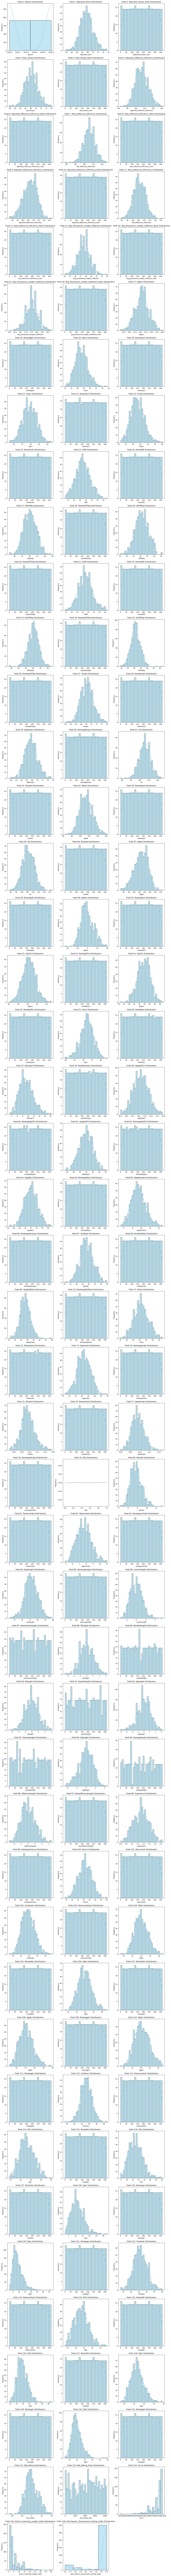

In [22]:
numeric_columns = df.select_dtypes(include=['number']).columns  # Select only numeric columns

# Set up the number of rows and columns for subplots
n = len(numeric_columns)
cols = 3  # Number of columns for subplots
rows = (n + cols - 1) // cols  # Calculate the number of rows needed

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate
i = 0 

# Plot a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    bins = 30
    if df[col].nunique() < bins and df[col].nunique() >= 1:
        bins = df[col].nunique()
    sns.histplot(df[col], kde=True, ax=axes[i], bins=bins, color='skyblue', edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Field {i}: {col.title()} Distribution')

# Hide any extra subplots if the numeric columns are not divisible by three.
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout to ensure there's no overlap
plt.tight_layout()

# Show the figure
plt.show()

In [23]:
df.describe()

season  adjusted_temo  adjusted_tempo_rank   raw_tempo  \
count   726.000000     726.000000           726.000000  726.000000   
mean   2024.501377      67.573140           182.001377   68.261846   
std       0.500343       2.443256           104.863307    2.457482   
min    2024.000000      59.400000             1.000000   59.800000   
25%    2024.000000      65.900000            91.250000   66.500000   
50%    2025.000000      67.500000           182.000000   68.300000   
75%    2025.000000      69.100000           272.750000   69.900000   
max    2025.000000      75.300000           364.000000   75.900000   

       raw_tempo_rank  adjusted_offensive_efficiency  \
count      726.000000                     726.000000   
mean       182.001377                     106.726584   
std        104.863307                       7.496171   
min          1.000000                      82.200000   
25%         91.250000                     101.300000   
50%        182.000000                     106.550000   
75%        272.750000                     111.500000   
max        364.000000                     130.700000   

       adjusted_offensive_efficiency_rank  raw_offensive_efficiency  \
count                          726.000000                726.000000   
mean                           182.001377                105.512672   
std                            104.863307                  6.433690   
min                              1.000000                 78.200000   
25%                             91.250000                101.200000   
50%                            182.000000                105.400000   
75%                            272.750000                109.875000   
max                            364.000000                125.300000   

       raw_offensive_efficiency_rank  adjusted_defensive_efficiency  \
count                     726.000000                     726.000000   
mean                      182.001377                     106.725069   
std                       104.863307                       6.436738   
min                         1.000000                      87.200000   
25%                        91.250000                     102.325000   
50%                       182.000000                     107.100000   
75%                       272.750000                     111.500000   
max                       364.000000                     126.800000   

       adjusted_defensive_efficiency_rank  raw_defensive_efficiency  \
count                          726.000000                726.000000   
mean                           182.001377                105.779752   
std                            104.863307                  5.293078   
min                              1.000000                 89.000000   
25%                             91.250000                102.200000   
50%                            182.000000                105.500000   
75%                            272.750000                109.400000   
max                            364.000000                126.200000   

       raw_defensive_efficiency_rank  avg_possession_length_(offense)  \
count                     726.000000                       726.000000   
mean                      182.001377                        17.585262   
std                       104.863307                         1.126687   
min                         1.000000                        14.100000   
25%                        91.250000                        16.900000   
50%                       182.000000                        17.600000   
75%                       272.750000                        18.275000   
max                       364.000000                        21.900000   

       avg_possession_length_(offense)_rank  avg_possession_length_(defense)  \
count                            726.000000                       726.000000   
mean                             182.001377                        17.548898   
std                              104.863307               

In [24]:
(df.isna().sum() / len(df)).sort_values(ascending=False)

dfp                                   1.0
season                                0.0
bench                                 0.0
pgheight                              0.0
rankpgheight                          0.0
                                     ... 
rankadjde                             0.0
adjem                                 0.0
rankadjem                             0.0
fg2pct                                0.0
top_12_in_ap_top_25_during_week_6?    0.0
Length: 147, dtype: float64

In [25]:
df = df.drop(columns='dfp')

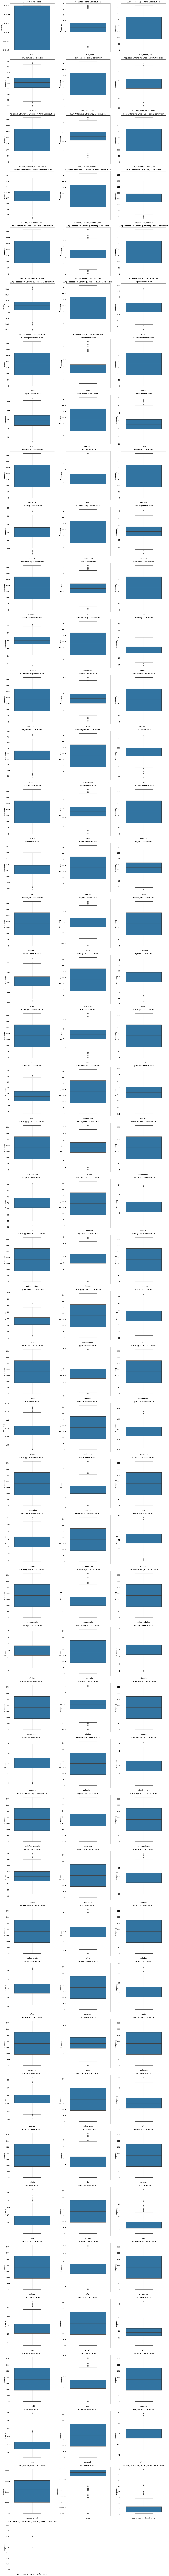

In [26]:
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns

# Set up the number of rows and columns for subplots
n = len(numeric_columns)
cols = 3  # Number of columns for subplots
rows = (n + cols - 1) // cols  # Calculate the number of rows needed

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate
i = 0

# Plot a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    sns.boxplot(df[col], ax=axes[i], patch_artist=True)  # Specify ax for each boxplot
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col.title()} Distribution')
    
# Hide any extra subplots if the numeric columns are not divisible by three.
for j in range(i + 1, len(axes)):
   axes[j].axis('off')

# Adjust the layout to ensure there's no overlap
plt.tight_layout()

# Show the figure
plt.show()

In [27]:
df.describe()

season  adjusted_temo  adjusted_tempo_rank   raw_tempo  \
count   726.000000     726.000000           726.000000  726.000000   
mean   2024.501377      67.573140           182.001377   68.261846   
std       0.500343       2.443256           104.863307    2.457482   
min    2024.000000      59.400000             1.000000   59.800000   
25%    2024.000000      65.900000            91.250000   66.500000   
50%    2025.000000      67.500000           182.000000   68.300000   
75%    2025.000000      69.100000           272.750000   69.900000   
max    2025.000000      75.300000           364.000000   75.900000   

       raw_tempo_rank  adjusted_offensive_efficiency  \
count      726.000000                     726.000000   
mean       182.001377                     106.726584   
std        104.863307                       7.496171   
min          1.000000                      82.200000   
25%         91.250000                     101.300000   
50%        182.000000                     106.550000   
75%        272.750000                     111.500000   
max        364.000000                     130.700000   

       adjusted_offensive_efficiency_rank  raw_offensive_efficiency  \
count                          726.000000                726.000000   
mean                           182.001377                105.512672   
std                            104.863307                  6.433690   
min                              1.000000                 78.200000   
25%                             91.250000                101.200000   
50%                            182.000000                105.400000   
75%                            272.750000                109.875000   
max                            364.000000                125.300000   

       raw_offensive_efficiency_rank  adjusted_defensive_efficiency  \
count                     726.000000                     726.000000   
mean                      182.001377                     106.725069   
std                       104.863307                       6.436738   
min                         1.000000                      87.200000   
25%                        91.250000                     102.325000   
50%                       182.000000                     107.100000   
75%                       272.750000                     111.500000   
max                       364.000000                     126.800000   

       adjusted_defensive_efficiency_rank  raw_defensive_efficiency  \
count                          726.000000                726.000000   
mean                           182.001377                105.779752   
std                            104.863307                  5.293078   
min                              1.000000                 89.000000   
25%                             91.250000                102.200000   
50%                            182.000000                105.500000   
75%                            272.750000                109.400000   
max                            364.000000                126.200000   

       raw_defensive_efficiency_rank  avg_possession_length_(offense)  \
count                     726.000000                       726.000000   
mean                      182.001377                        17.585262   
std                       104.863307                         1.126687   
min                         1.000000                        14.100000   
25%                        91.250000                        16.900000   
50%                       182.000000                        17.600000   
75%                       272.750000                        18.275000   
max                       364.000000                        21.900000   

       avg_possession_length_(offense)_rank  avg_possession_length_(defense)  \
count                            726.000000                       726.000000   
mean                             182.001377                        17.548898   
std                              104.863307               

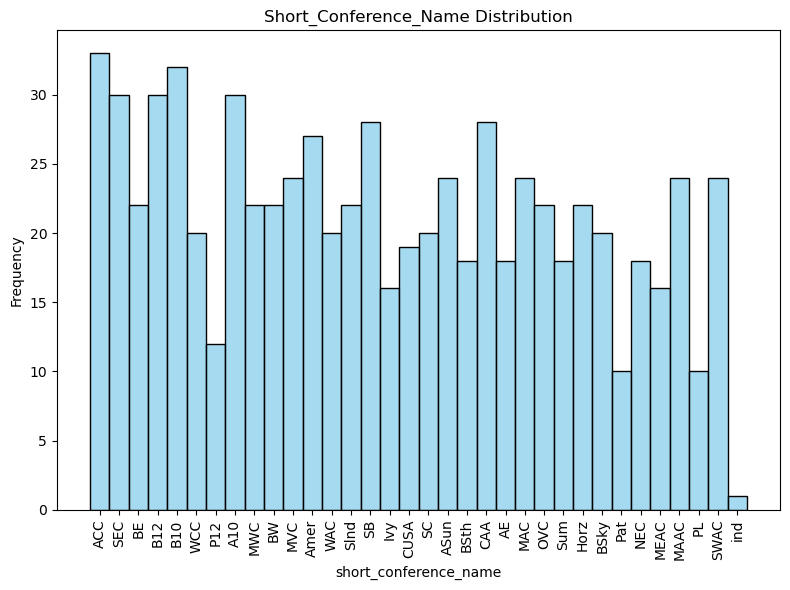

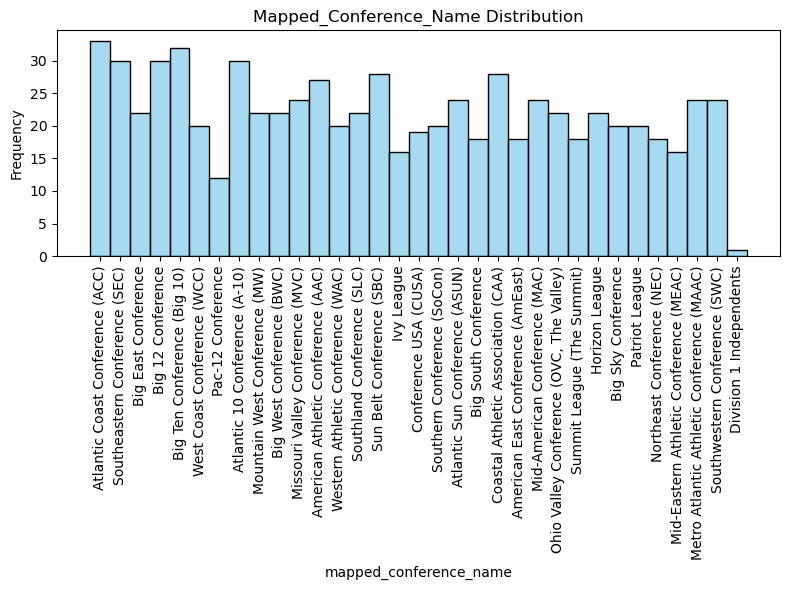

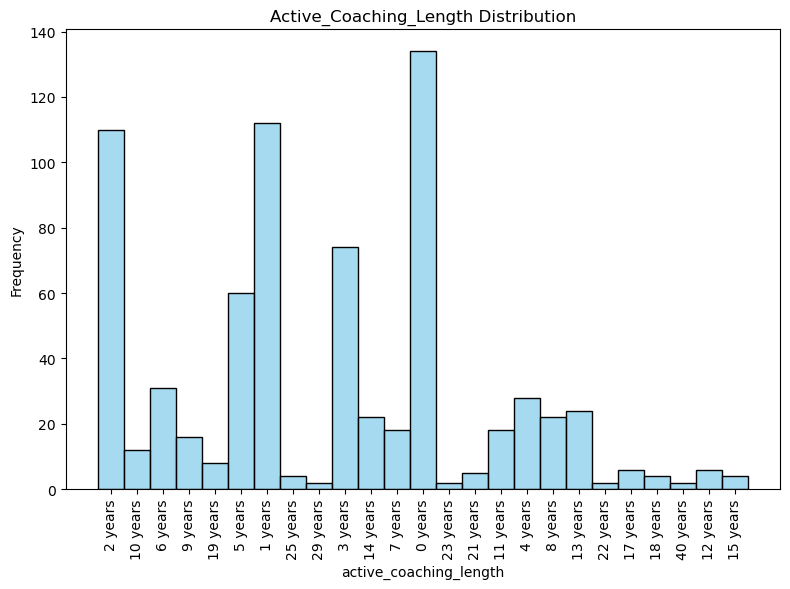

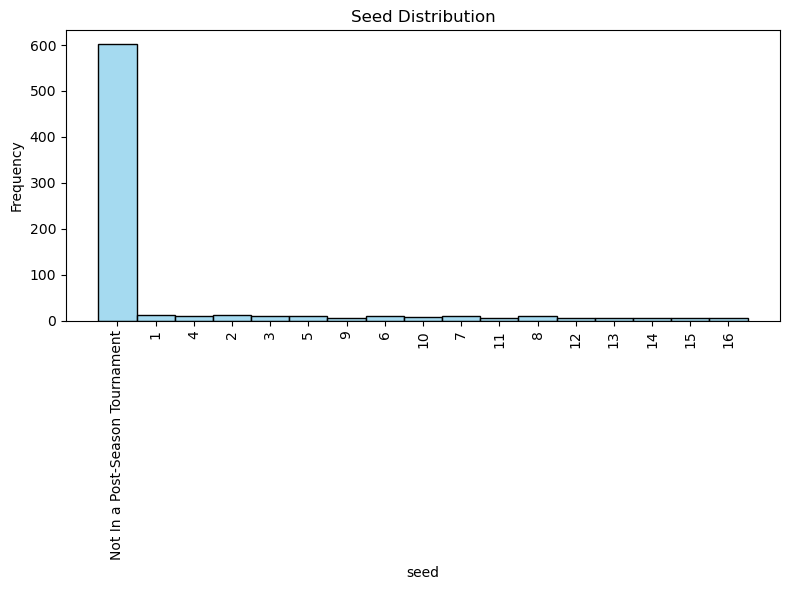

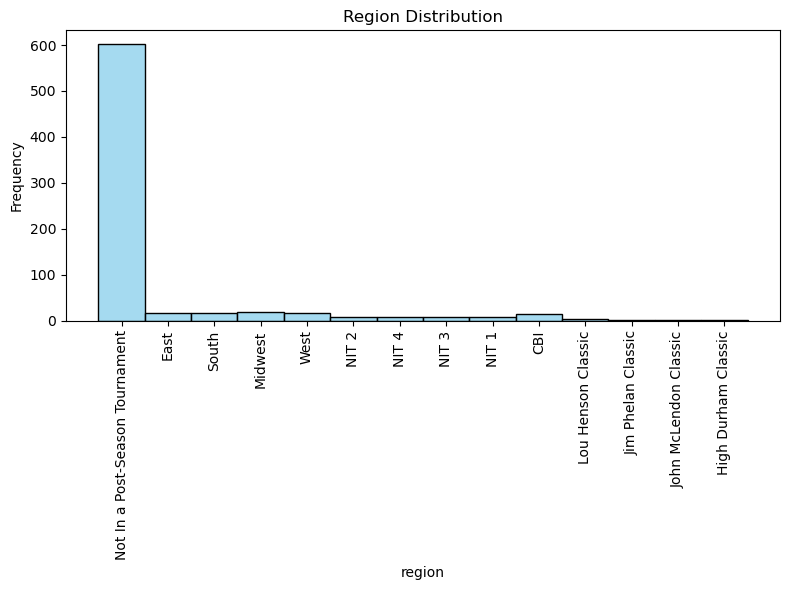

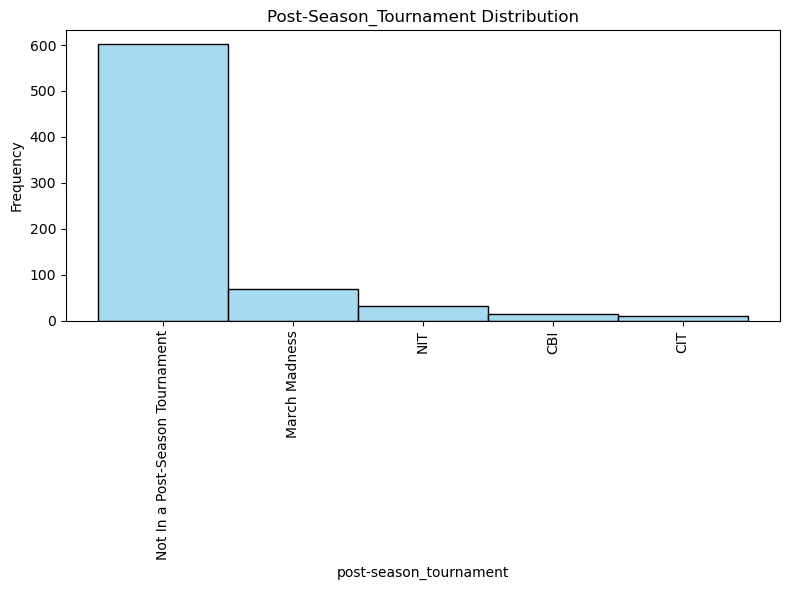

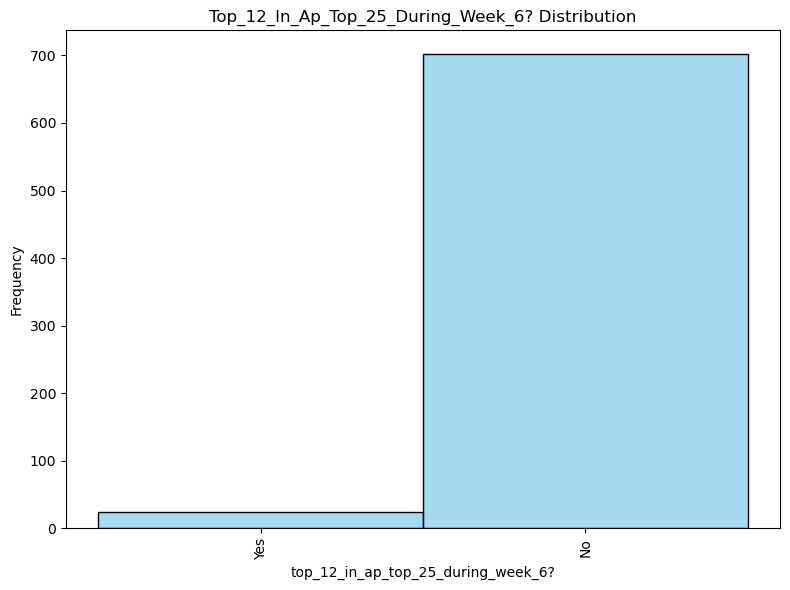

In [28]:
# Select only object columns
object_columns = df.select_dtypes(include=['object']).columns

# Loop through each column and plot one plot at a time
for i, col in enumerate(object_columns):
    if i not in {2, 3, 4}:
        plt.figure(figsize=(8, 6))  # Create a new figure for each plot
        bins = 30
        if df[col].nunique() < bins:
            bins = df[col].nunique()
        
        # Plot the histogram
        sns.histplot(df[col], bins=bins, color='skyblue', edgecolor='black')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'{col.title()} Distribution')
        
        # Rotate x-axis labels if needed
        plt.xticks(rotation=90)
        
        plt.tight_layout()
        plt.show()  # Loop will display each plot one by one


Each object field was provided with its own plot and blown up given the number of possible values and the fact that unique text values cannot be represented in the same bin together. Some of this data would need to be encoded. Other fields like active_coaching_length can be converted to an int rather easily. But it's easier to just drop the fields not viewed as useful for modeling.

In [31]:
df['full_team_name'].nunique()

364

### Explanation of Columns in the Data:

The following columns have been selected to analyze team performance for the 2025 season:

1. **teamname**: The name of the team participating in the analysis.
2. **efgpct_x**: The effective field goal percentage, a metric that adjusts the field goal percentage to account for the added value of three-point shots.
3. **topct_x**: The turnover percentage, which represents the percentage of offensive possessions that end in a turnover.
4. **orpct_x**: The offensive rebound percentage, indicating the percentage of available offensive rebounds a team captures.
5. **ftrate_x**: The free throw rate, which measures the number of free throws taken relative to the number of field goal attempts.
6. **adjusted_temo**: The adjusted tempo, which reflects the team's pace of play, considering the tempo of both the team and its opponents.
7. **adjusted_offensive_efficiency**: The adjusted offensive efficiency, which measures the team's offensive output per 100 possessions, accounting for the strength of the team's opponents.
8. **adjusted_defensive_efficiency**: The adjusted defensive efficiency, which measures how effectively the team defends per 100 possessions, considering the strength of their opponents.
9. **experience**: The average years of experience for the players on the team, representing their familiarity and maturity in the game.
10. **bench**: The total contribution from the bench players, reflecting the depth of the team's roster.
11. **fg2pct**: The field goal percentage for two-point attempts, indicating how efficiently the team scores inside the arc.
12. **fg3pct**: The field goal percentage for three-point attempts, showing the team's shooting efficiency from beyond the arc.
13. **ftpct**: The free throw percentage, measuring how successful the team is in converting free throws.

We will be dropping the other columns.

In [33]:
# reducing columns
columns_keep = [
    'season',  # commented it out since only looking at 2025
    'full_team_name',  
    'efgpct',  
    'topct',  
    'orpct',  
    'ftrate',  
    'adjusted_temo',  
    'adjusted_offensive_efficiency',  
    'adjusted_defensive_efficiency',  
    'experience',  
    'bench',  
    'fg2pct',  
    'fg3pct',  
    'ftpct',  
]

# reducing data to these features
df = df[columns_keep]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 14 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   season                         int64  
 1   full_team_name                 object 
 2   efgpct                         float64
 3   topct                          float64
 4   orpct                          float64
 5   ftrate                         float64
 6   adjusted_temo                  float64
 7   adjusted_offensive_efficiency  float64
 8   adjusted_defensive_efficiency  float64
 9   experience                     float64
 10  bench                          float64
 11  fg2pct                         float64
 12  fg3pct                         float64
 13  ftpct                          float64
dtypes: float64(12), int64(1), object(1)
memory usage: 79.5+ KB


### Encoding